In [33]:
import warnings
warnings.filterwarnings('ignore')

In [43]:
from bs4 import BeautifulSoup 
import urllib
import urllib.request as rq
import pandas as pd

global news_df

def News():
    global news_df
    
    keyword = input('검색 키워드를 입력해주세요 ')
    keyword = urllib.parse.quote(keyword) #퍼센트인코딩 #URL에 문자를 표현하는 인코딩방법(URL에 한글이 섞이면 오류 발생)
    num = int(input('추출할 뉴스기사의 숫자를 입력해주세요 '))
    
    news_df = pd.DataFrame(columns=['title','url']) 
    
    page_num=1
    i=0 #크롤링한 기사의 수
    while num > i:
        url = 'https://search.naver.com/search.naver?where=news&sm=tab_jum&query='+keyword+'&start='+str(page_num)
        html = rq.urlopen(url)
        bs = BeautifulSoup(html,'html.parser') ##html_doc 데이터를 html.parser로 파싱한 뒤 BeautifulSoup 객체를 생성해서 bs 변수에 넣음 
        texts = bs.find_all(class_='news_tit')

        for text in texts:
            news_df.loc[i,'title'] = text.get_text()
            news_df.loc[i,'url'] = text.get('href')
            # news_df.loc[i,'url'] = text['href']
            i +=1
            if i == num:
                break
        page_num +=10
    return news_df

News()

검색 키워드를 입력해주세요  노인 심각
추출할 뉴스기사의 숫자를 입력해주세요  1000


,title,url
0,"경찰, '노인 교통사고 예방' 백일섭·김성환에 감사장",http://www.newsis.com/view/?id=NISX20220818_00...
1,"[칼럼] 농촌, 노인 인구 어디까지 갈 것인가!",http://www.jeollailbo.com/news/articleView.htm...
2,53개 지표로 확인된 경남 낙후성 ‘심각’,https://news.kbs.co.kr/news/view.do?ncd=553354...
3,53개 지표로 확인된 경남 낙후성 ‘심각’,https://news.kbs.co.kr/news/view.do?ncd=553328...
4,"윤석명 ""노인 소득양극화 심각, 동일연금제도 필요""",http://www.inews24.com/view/1508663
...,...,...
995,"노인 빈곤, 더 이상 방치는 안 된다",http://www.cctoday.co.kr/?mod=news&act=article...
996,"'고용 통계' 두고 나홀로 긍정 해석한 文정부…""현실은 더 심각""",http://www.inews24.com/view/1451224
997,"대구수성경찰서, 노인 교통사고예방 캠페인",http://www.ksmnews.co.kr/default/index_view_pa...
998,[열린마당] 노인빈곤율 OECD 1위… 더 이상 방관 안돼,http://www.segye.com/content/html/2018/05/24/2...


In [44]:
import re
target = news_df['title'].values #Series.values = array
title_list = target.tolist() # array > list
text = ' '.join(title_list) #list들을 공백으로 구분해서 연결
text = re.sub('[^가-힣]+',' ',text) #한글 이외는 공백으로 대체

In [45]:
#konlpy(콘엘피) = 형태소 분석
from konlpy.tag import Okt
from collections import Counter
okt = Okt() #객체형성

morph = okt.pos(text) #형태소로 변환 #word= 단어 / tag=품사
morph

noun_list =[]
stop_word = ['노인','노인학','심각','예방','문제','전문','한국']
for word, tag in morph: #word= 단어 / tag=품사
    if(tag=='Noun') & (len(word)>1): #noun이고 단어가 1글자 이상인것(1글자는 보통 조사이기때문)
        if word not in stop_word:
            noun_list.append(word)

count = Counter(noun_list) #단어별 숫자세주기


data =dict(count.most_common()) #빈도수 정리 내림차
series = pd.Series(data)
df=pd.DataFrame(series, columns=['cnt'])

df

,cnt
빈곤,115
학대,66
사회,60
보호,51
기관,44
...,...
무관심,1
정읍,1
긍정,1
해석,1


In [46]:
df_test= df[df['cnt'] > 10]  #몇 번 이상 등장한 단어를 뽑아낼 건지 정하기 

In [47]:
df_stop_words = df_test.head(20)
df_stop_words = df_stop_words.reset_index()
df_stop_words

,index,cnt
0,빈곤,115
1,학대,66
2,사회,60
3,보호,51
4,기관,44
5,고령화,42
6,교육,36
7,기념,35
8,치매,35
9,캠페인,34


In [48]:
stop_word = df_stop_words['index'].tolist()
#stop_word

In [51]:
#konlpy(콘엘피) = 형태소 분석
from konlpy.tag import Okt
from collections import Counter
okt = Okt() #객체형성

morph = okt.pos(text) #형태소로 변환 #word= 단어 / tag=품사
morph

noun_list =[]
stop_word =['노인','노인학','심각','예방','문제','전문','한국']
for word, tag in morph: #word= 단어 / tag=품사
    if(tag=='Noun') & (len(word)>1): #noun이고 단어가 1글자 이상인것(1글자는 보통 조사이기때문)
        if word not in stop_word:
            noun_list.append(word)

count = Counter(noun_list) #단어별 숫자세주기

In [52]:
data =dict(count.most_common()) #빈도수 정리 내림차
series = pd.Series(data)
df=pd.DataFrame(series, columns=['cnt'])

df

,cnt
빈곤,115
학대,66
사회,60
보호,51
기관,44
...,...
무관심,1
정읍,1
긍정,1
해석,1


In [53]:
from matplotlib import rc
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family='AppleGothic')# 한글 폰트 설정

(-0.5, 3999.5, 2999.5, -0.5)

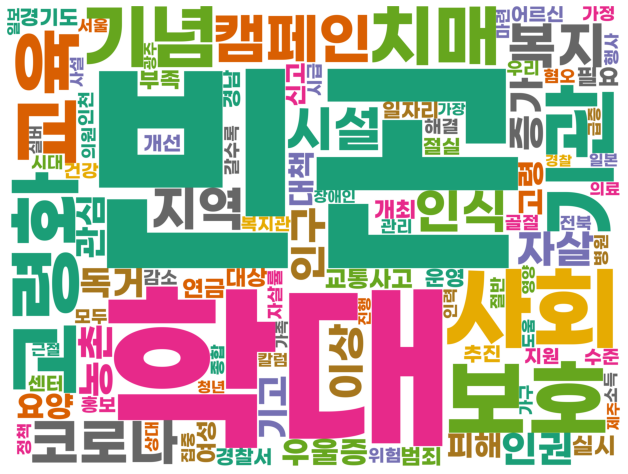

In [56]:
from wordcloud import WordCloud

#generate_from_frequencies 미리 정의된 단어의 빈도수 dict를 이용하여 워드 클라우드를 그림
#  워드 클라우드를 generate할 때 마다 스타일이 미세하게 다르게 형성되는데,random_state 인자를 지정해주면 생성할 때마다 완전히 동일한 결과
wordcloud = WordCloud(font_path='GmarketSansTTFBold.ttf', width= 4000, 
                      height = 3000, random_state=1, background_color='white', 
                      colormap='Dark2', max_words=100).generate_from_frequencies(data)
plt.figure(figsize = (11, 11))
plt.imshow(wordcloud) #이미지 표시
plt.axis('off') #축 지우기

In [57]:
from bs4 import BeautifulSoup 
import urllib
import urllib.request as rq
import pandas as pd

global news_df

def News():
    global news_df
    
    keyword = input('검색 키워드를 입력해주세요 ')
    keyword = urllib.parse.quote(keyword) #퍼센트인코딩 #URL에 문자를 표현하는 인코딩방법(URL에 한글이 섞이면 오류 발생)
    num = int(input('추출할 뉴스기사의 숫자를 입력해주세요 '))
    
    news_df = pd.DataFrame(columns=['title','url']) 
    
    page_num=1
    i=0 #크롤링한 기사의 수
    while num > i:
        url = 'https://search.naver.com/search.naver?where=news&sm=tab_jum&query='+keyword+'&start='+str(page_num)
        html = rq.urlopen(url)
        bs = BeautifulSoup(html,'html.parser') ##html_doc 데이터를 html.parser로 파싱한 뒤 BeautifulSoup 객체를 생성해서 bs 변수에 넣음 
        texts = bs.find_all(class_='news_tit')

        for text in texts:
            news_df.loc[i,'title'] = text.get_text()
            news_df.loc[i,'url'] = text.get('href')
            # news_df.loc[i,'url'] = text['href']
            i +=1
            if i == num:
                break
        page_num +=10
    return news_df

News()

검색 키워드를 입력해주세요  노인 문제
추출할 뉴스기사의 숫자를 입력해주세요  1000


,title,url
0,"LGU+, 노인 낙상 감지 '스마트레이더' 개발",https://zdnet.co.kr/view/?no=20220822091319
1,"LG 유플러스 레이더서비스 개발…""노인·장애인 안전사고, 기술 이용해 예방""",http://news.tvchosun.com/site/data/html_dir/20...
2,"새마을금고재단, 노인복지시설에 1.5억상당 차량지원",http://www.edaily.co.kr/news/newspath.asp?news...
3,"고양시대화노인종합복지관, 취약계층 디지털 교육 실시",https://www.siminilbo.co.kr/news/newsview.php?...
4,3일간 실종된 치매 노인 찾고 보니 주머니에 돈 다발이..대체 무슨 일?,https://nownews.seoul.co.kr/news/newsView.php?...
...,...,...
995,"인천시, '노인 자살예방 영상' 콘텐츠 제작",http://www.cstimes.com/news/articleView.html?i...
996,"경기도, 사회복지기금 노인복지 지원사업 참여 기관 모집",https://www.asiatoday.co.kr/view.php?key=20220...
997,"윤석열 ""기초연금 1인당 40만원으로 올려 노인빈곤 해소""",https://hankookilbo.com/News/Read/A20220216185...
998,"인천시, 노인 자살예방 위한 영상 콘텐츠 제작",https://www.dnews.co.kr/uhtml/view.jsp?idxno=2...


In [58]:
import re
target = news_df['title'].values #Series.values = array
title_list = target.tolist() # array > list
text = ' '.join(title_list) #list들을 공백으로 구분해서 연결
text = re.sub('[^가-힣]+',' ',text) #한글 이외는 공백으로 대체

In [59]:
#konlpy(콘엘피) = 형태소 분석
from konlpy.tag import Okt
from collections import Counter
okt = Okt() #객체형성

morph = okt.pos(text) #형태소로 변환 #word= 단어 / tag=품사
morph

noun_list =[]
stop_word = []
for word, tag in morph: #word= 단어 / tag=품사
    if(tag=='Noun') & (len(word)>1): #noun이고 단어가 1글자 이상인것(1글자는 보통 조사이기때문)
        if word not in stop_word:
            noun_list.append(word)

count = Counter(noun_list) #단어별 숫자세주기


data =dict(count.most_common()) #빈도수 정리 내림차
series = pd.Series(data)
df=pd.DataFrame(series, columns=['cnt'])

df

,cnt
노인,704
복지,88
문제,77
개발,65
안전,65
...,...
소상,1
공인,1
금세,1
요실금,1


In [60]:
df_test= df[df['cnt'] > 10]  #몇 번 이상 등장한 단어를 뽑아낼 건지 정하기 

In [61]:
df_stop_words = df_test.head(20)
df_stop_words = df_stop_words.reset_index()
df_stop_words

,index,cnt
0,노인,704
1,복지,88
2,문제,77
3,개발,65
4,안전,65
5,노인학,62
6,사회,58
7,독거,57
8,예방,55
9,지원,49


In [63]:
stop_word = df_stop_words['index'].tolist()
#stop_word

In [ ]:
#konlpy(콘엘피) = 형태소 분석
from konlpy.tag import Okt
from collections import Counter
okt = Okt() #객체형성

morph = okt.pos(text) #형태소로 변환 #word= 단어 / tag=품사
morph

noun_list =[]
stop_word =[]
for word, tag in morph: #word= 단어 / tag=품사
    if(tag=='Noun') & (len(word)>1): #noun이고 단어가 1글자 이상인것(1글자는 보통 조사이기때문)
        if word not in stop_word:
            noun_list.append(word)

count = Counter(noun_list) #단어별 숫자세주기

In [ ]:
data =dict(count.most_common()) #빈도수 정리 내림차
series = pd.Series(data)
df=pd.DataFrame(series, columns=['cnt'])

df

In [1]:
from bs4 import BeautifulSoup 
import urllib
import urllib.request as rq
import pandas as pd

global news_df

def News():
    global news_df
    
    keyword = input('검색 키워드를 입력해주세요 ')
    keyword = urllib.parse.quote(keyword) #퍼센트인코딩 #URL에 문자를 표현하는 인코딩방법(URL에 한글이 섞이면 오류 발생)
    num = int(input('추출할 뉴스기사의 숫자를 입력해주세요 '))
    
    news_df = pd.DataFrame(columns=['title','url']) 
    
    page_num=1
    i=0 #크롤링한 기사의 수
    while num > i:
        url = 'https://search.naver.com/search.naver?where=news&sm=tab_jum&query='+keyword+'&start='+str(page_num)
        html = rq.urlopen(url)
        bs = BeautifulSoup(html,'html.parser') ##html_doc 데이터를 html.parser로 파싱한 뒤 BeautifulSoup 객체를 생성해서 bs 변수에 넣음 
        texts = bs.find_all(class_='news_tit')

        for text in texts:
            news_df.loc[i,'title'] = text.get_text()
            news_df.loc[i,'url'] = text.get('href')
            # news_df.loc[i,'url'] = text['href']
            i +=1
            if i == num:
                break
        page_num +=10
    return news_df

News()

검색 키워드를 입력해주세요  노인 교육
추출할 뉴스기사의 숫자를 입력해주세요  1000


,title,url
0,"서귀포시, 홀로 사는 노인 실태조사 추진",http://news.tf.co.kr/read/national/1960088.htm
1,"조시영 대창 회장, 군산교육발전진흥재단에 1000만원 기탁",https://www.news1.kr/articles/4779548
2,"LH, 80세이상 독거노인 ‘생활돌봄 서비스’ 시범실시",https://www.khan.co.kr/economy/real_estate/art...
3,"익산소방서, 노인일자리 참여자 소방안전교육",http://sjbnews.com/news/news.php?number=754540
4,"울진군노인복지관, 하반기 교육프로그램 수강생 모집",http://www.nspna.com/news/?mode=view&newsid=58...
...,...,...
995,"서울시약, 8월 10일 노인약료 전문가 11주 교육 개강",http://www.dailypharm.com/Users/News/NewsView....
996,[포토뉴스]홍천청소년수련관 바리스타 교육,http://www.kwnews.co.kr/page/view/202207271004...
997,"울진 금강송면, 노인일자리사업 실시",http://www.ksmnews.co.kr/default/index_view_pa...
998,"대한노인회 전남 무안군지회, 483명 대상 노인일자리 혹서기 활동교육 성료",http://www.100ssd.co.kr/news/articleView.html?...


In [2]:
import re
target = news_df['title'].values #Series.values = array
title_list = target.tolist() # array > list
text = ' '.join(title_list) #list들을 공백으로 구분해서 연결
text = re.sub('[^가-힣]+',' ',text) #한글 이외는 공백으로 대체

In [3]:
#konlpy(콘엘피) = 형태소 분석
from konlpy.tag import Okt
from collections import Counter
okt = Okt() #객체형성

morph = okt.pos(text) #형태소로 변환 #word= 단어 / tag=품사
morph

noun_list =[]
stop_word = []
for word, tag in morph: #word= 단어 / tag=품사
    if(tag=='Noun') & (len(word)>1): #noun이고 단어가 1글자 이상인것(1글자는 보통 조사이기때문)
        if word not in stop_word:
            noun_list.append(word)

count = Counter(noun_list) #단어별 숫자세주기


data =dict(count.most_common()) #빈도수 정리 내림차
series = pd.Series(data)
df=pd.DataFrame(series, columns=['cnt'])

df

,cnt
노인,660
교육,471
실시,164
일자리,130
복지관,107
...,...
범죄,1
시약,1
홍천,1
금강송,1


In [4]:
df_test= df[df['cnt'] > 10]  #몇 번 이상 등장한 단어를 뽑아낼 건지 정하기 

In [5]:
df_stop_words = df_test.head(20)
df_stop_words = df_stop_words.reset_index()
df_stop_words

,index,cnt
0,노인,660
1,교육,471
2,실시,164
3,일자리,130
4,복지관,107
5,안전교육,101
6,사업,99
7,대상,88
8,참여자,79
9,예방,72


In [6]:
stop_word = df_stop_words['index'].tolist()
#stop_word

In [28]:
#konlpy(콘엘피) = 형태소 분석
from konlpy.tag import Okt
from collections import Counter
okt = Okt() #객체형성

morph = okt.pos(text) #형태소로 변환 #word= 단어 / tag=품사
morph

noun_list =[]
stop_word =['노인','교육','실시','대상','참여자','지원','운영','맞춤','시설','사회','협약','종합','활동','서비스','복지관','강화','경로당','업무',
           '추진','생활','진행','개최','모집','기관']
for word, tag in morph: #word= 단어 / tag=품사
    if(tag=='Noun') & (len(word)>1): #noun이고 단어가 1글자 이상인것(1글자는 보통 조사이기때문)
        if word not in stop_word:
            noun_list.append(word)

count = Counter(noun_list) #단어별 숫자세주기

In [29]:
data =dict(count.most_common()) #빈도수 정리 내림차
series = pd.Series(data)
df=pd.DataFrame(series, columns=['cnt'])

df

,cnt
일자리,130
안전교육,101
사업,99
예방,72
복지,71
...,...
범죄,1
시약,1
홍천,1
금강송,1


In [30]:
df_test= df[df['cnt'] > 10] 

In [31]:
df_stop_words = df_test.head(20)
df_stop_words = df_stop_words.reset_index()
df_stop_words

,index,cnt
0,일자리,130
1,안전교육,101
2,사업,99
3,예방,72
4,복지,71
5,소방,66
6,어르신,66
7,안전,48
8,프로그램,47
9,센터,45


In [ ]:
from matplotlib import rc
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family='AppleGothic')# 한글 폰트 설정

In [ ]:
from wordcloud import WordCloud

#generate_from_frequencies 미리 정의된 단어의 빈도수 dict를 이용하여 워드 클라우드를 그림
#  워드 클라우드를 generate할 때 마다 스타일이 미세하게 다르게 형성되는데,random_state 인자를 지정해주면 생성할 때마다 완전히 동일한 결과
wordcloud = WordCloud(font_path='GmarketSansTTFBold.ttf', width= 4000, 
                      height = 3000, random_state=1, background_color='white', 
                      colormap='Dark2', max_words=100).generate_from_frequencies(data)
plt.figure(figsize = (11, 11))
plt.imshow(wordcloud) #이미지 표시
plt.axis('off') #축 지우기